In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from dateutil import relativedelta
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/laurakirk/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['relativedelta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [67]:
col_names = ['customer_id','amount','date']
original_df = pd.read_csv('purchases.txt',delimiter='\t',names=col_names)
original_df.date = pd.to_datetime(original_df['date']) ## datetime
original_df['month'] = pd.DatetimeIndex(original_df['date']).month ## add in month
original_df['year'] = pd.DatetimeIndex(original_df['date']).year ## add in year
original_df.date = pd.DatetimeIndex(original_df['date'])
##days
start_date = datetime.datetime(2016,1,1)
original_df['days_since_purchase'] = start_date -original_df.date  ## days since last purchase for each purchase


In [68]:
#http://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [69]:
#Months
original_df['months_since_purchase']=original_df.date.apply(lambda x: diff_month(start_date,x))
#Year
original_df['years_since_purchase']=original_df.date.apply(lambda x: diff_year(start_date,x))


In [70]:
## Create indicators for our state
original_df['state_one'] = original_df.years_since_purchase.apply(lambda x: 3-x) >=0
original_df['state_two'] =  original_df.years_since_purchase.apply(lambda x: x>3 and x<=6)
original_df['state_three'] =  original_df.years_since_purchase.apply(lambda x: x>6 and x<=9)

In [71]:
original_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
0,760,25.0,2009-11-06,11,2009,2247 days,74,7,False,False,True
1,860,50.0,2012-09-28,9,2012,1190 days,40,4,False,True,False
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,False,False,False
3,1420,50.0,2009-07-09,7,2009,2367 days,78,7,False,False,True
4,1940,70.0,2013-01-25,1,2013,1071 days,36,3,True,False,False


In [72]:
## On average people make 2.78 purchases
print('Average purchases', np.mean(original_df.groupby(by=['customer_id']).count()['amount']))
# Median purcahses are 2.0
print('Median purchases', np.median(original_df.groupby(by=['customer_id']).count()['amount']))


Average purchases 2.7823749796383774
Median purchases 2.0


In [11]:
## Average number of months since purchase per customer id
avg_months_since_purchase_per_customer= original_df.groupby(by=['customer_id',])['months_since_purchase'].mean().reset_index()

In [12]:
print('Average months in-between purchases',np.mean(avg_months_since_purchase_per_customer.months_since_purchase))
print('Median number of months in-between purchases',np.median(avg_months_since_purchase_per_customer.months_since_purchase))

('Average months in-between purchases', 53.749820869899438)
('Median number of months in-between purchases', 51.666666666666664)


In [14]:
print('Average years in-between purchases',np.mean(original_df.years_since_purchase))
print('Median years quarters in-between purchases',np.median(original_df.years_since_purchase))

('Average years in-between purchases', 5.1303007240013274)
('Median years quarters in-between purchases', 5.0)


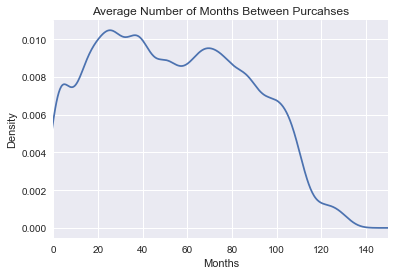

In [16]:
truncated_avg_months_customer.months_since_purchase.plot(kind='kde',xlim=[0,150])
plt.title('Average Number of Months Between Purcahses')
plt.xlabel('Months')

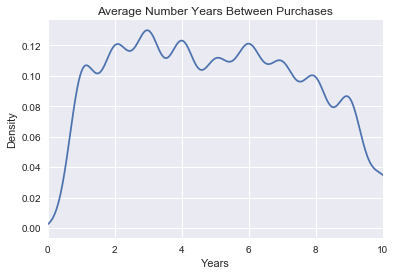

In [10]:
original_df.groupby(by=['customer_id'])['years_since_purchase'].mean().reset_index()['years_since_purchase'].plot(kind='kde',xlim=[0,10])
plt.title('Average Number Years Between Purchases')
plt.xlabel('Years')

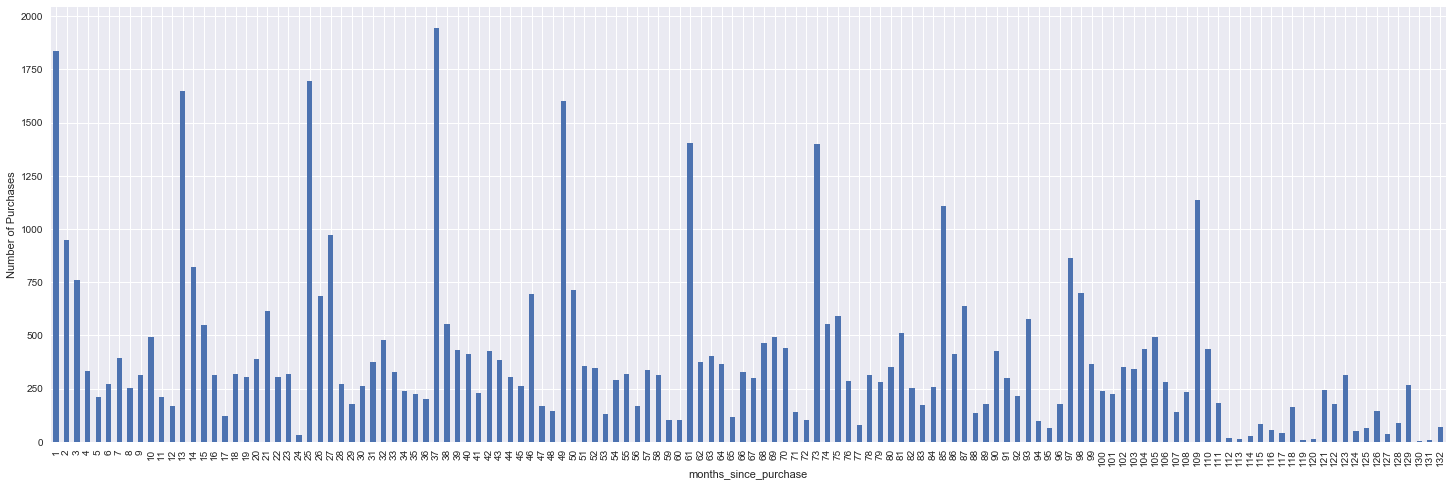

In [18]:
## Number of purchases per month total - not by unique customer id
original_df.groupby(by=['months_since_purchase']).count()['customer_id'].plot(kind='bar',figsize=([25,8]))
plt.ylabel('Number of Purchases')

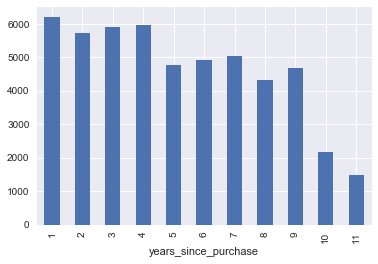

In [19]:
## Number of pruchases per year total - not by unique customer id
original_df.groupby(by=['years_since_purchase']).count()['customer_id'].plot(kind='bar')

In [74]:
cumulative_purchases_per_year = original_df.groupby(by=['years_since_purchase']).count()['customer_id'].apply(
lambda x: x/sum(original_df.groupby(by=['years_since_purchase']).count())).reset_index()

In [75]:
cumulative_purchases_per_year['running_total'] = cumulative_purchases_per_year.customer_id.cumsum()

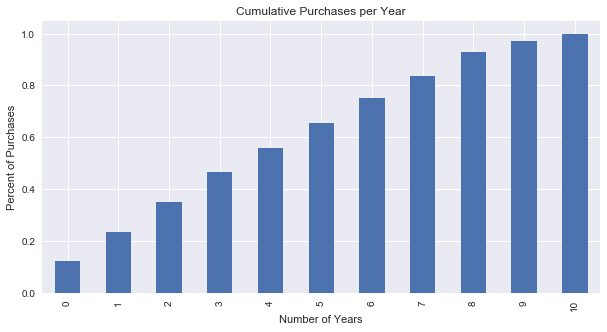

In [77]:
## Cumulative purchases over years
plt.figure(figsize=(10,5))
cumulative_purchases_per_year.running_total.plot(kind='bar')
plt.ylabel('Percent of Purchases')
plt.xlabel('Number of Years')
plt.title('Cumulative Purchases per Year')

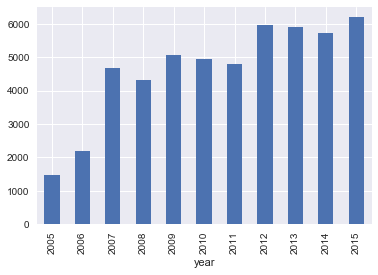

In [23]:
## Total number of purchases per year
original_df.groupby(['year']).count()['customer_id'].plot(kind='bar')

## Remove Purchases made in 10 or 11 years ago (less than 5% of purchases)

In [11]:
## drop these 
original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,False,False,False
6,2620,30.0,2006-03-09,3,2006,3585 days,118,10,False,False,False
8,3120,150.0,2006-11-08,11,2006,3341 days,110,10,False,False,False
12,4000,20.0,2005-11-25,11,2005,3689 days,122,11,False,False,False
16,4840,30.0,2005-10-14,10,2005,3731 days,123,11,False,False,False
17,4910,15.0,2006-12-13,12,2006,3306 days,109,10,False,False,False
19,4970,30.0,2006-12-01,12,2006,3318 days,109,10,False,False,False
20,5250,50.0,2005-12-20,12,2005,3664 days,121,11,False,False,False
22,5990,30.0,2006-03-17,3,2006,3577 days,118,10,False,False,False
23,6240,100.0,2006-11-09,11,2006,3340 days,110,10,False,False,False


In [12]:
indexes_to_drop = original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)].index

In [14]:
# this drops the last years (with very few purchases)
state_df = original_df.drop(original_df.index[indexes_to_drop])

In [15]:
## Confirm we dropped everything correctly
state_df[(state_df.state_one == False) &
            (state_df.state_two == False) &
                (state_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three


# Define a reward vector
- This is the expected amount of money the firm will receive in every state

In [116]:
# frequency flag less than 2
frequency_less2 = (state_df.groupby('customer_id').count()<2).reset_index()

In [219]:
frequency_less2 = frequency_less2[['customer_id','amount']]
frequency_less2['one_purchase']=frequency_less2['amount']

In [220]:
## frequency flag greater than or equal to 2
frequency_more2 = (state_df.groupby('customer_id').count()>=2).reset_index()
frequency_more2 = frequency_more2[['customer_id','amount']]
frequency_more2['2_or_more_purchases']=frequency_more2['amount']

In [132]:
# amount flag less than 30
amount_less30 = (state_df.groupby('customer_id').mean()<30).reset_index()
amount_less30 = amount_less30[['customer_id','amount']]
amount_less30['average_amount_<_30'] = amount_less30['amount']

In [226]:
# amount flag more than
amount_more30 = (state_df.groupby('customer_id').mean()>=30).reset_index()
amount_more30 = amount_more30[['customer_id','amount']]
amount_more30['average_amount_=>_30'] = amount_more30['amount']

In [156]:
# Recency 1-<2 years
recency_1_2 = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]

In [157]:
recency_1_2['purchased_in_past_1<2_yrs.']=recency_1_2.years_since_purchase<2

In [158]:
recency_1_2.drop(recency_1_2[['amount','date','month','days_since_purchase','months_since_purchase',
                  'years_since_purchase','state_one','state_two','state_three','year']],axis=1,inplace=True)

In [254]:
recency_more2_less4 = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]
recency_more2_less4['purchased_in_past_>=2<4_yrs.']=(recency_more2_less4.years_since_purchase>=2 )\
                                                    & (recency_more2_less4.years_since_purchase<4) 
recency_more2_less4.drop(recency_more2_less4[['amount','date','month','days_since_purchase','months_since_purchase',
                  'years_since_purchase','state_one','state_two','state_three','year']],axis=1,inplace=True)

In [255]:
recency_more4_less6 = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]
recency_more4_less6['purchased_in_past_>=4<6_yrs.']=(recency_more4_less6.years_since_purchase>=4 )\
                                                    & (recency_more4_less6.years_since_purchase<6) 
recency_more4_less6.drop(recency_more4_less6[['amount','date','month','days_since_purchase','months_since_purchase',
                  'years_since_purchase','state_one','state_two','state_three','year']],axis=1,inplace=True)

In [268]:
recency_more6_less8 = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]
recency_more6_less8['purchased_in_past_>=6<8_yrs.']=(recency_more6_less8.years_since_purchase>=6 )\
                                                    & (recency_more6_less8.years_since_purchase<8) 
recency_more6_less8.drop(recency_more6_less8[['amount','date','month','days_since_purchase','months_since_purchase',
                  'years_since_purchase','state_one','state_two','state_three','year']],axis=1,inplace=True)

In [275]:
### merge everything now
reward_state = state_df.copy()
reward_states_list = [frequency_less2,frequency_more2,amount_more30,amount_less30,recency_1_2,\
                  recency_more2_less4,recency_more4_less6,recency_more6_less8]



In [276]:
for dataframe in reward_states_list:
    temp =pd.merge(reward_state,dataframe,on='customer_id')
    reward_state = temp

In [279]:
# have the Df
reward_state.columns

Index(['customer_id', 'amount_x', 'months_since_purchase',
       'years_since_purchase', 'amount_y', 'one_purchase', 'amount_x',
       '2_or_more_purchases', 'amount_y', 'average_amount_=>_30',
       'average_amount_<_30', 'purchased_in_past_1<2_yrs.',
       'purchased_in_past_>=2<4_yrs.', 'purchased_in_past_>=4<6_yrs.',
       'purchased_in_past_>=6<8_yrs.'],
      dtype='object')

In [278]:
# clean up
reward_state = reward_state.drop(labels=\
        ['amount','state_one','state_two','state_three','date','month','year','days_since_purchase'],axis=1)

In [249]:
state_one_reward = np.mean(reward_state[(reward_state['purchased_in_past_1<2_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [250]:
state_two_reward = np.mean(reward_state[(reward_state['purchased_in_past_1<2_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]

In [252]:
state_three_reward = np.mean(reward_state[(reward_state['purchased_in_past_1<2_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]

In [253]:
state_four_reward = np.mean(reward_state[(reward_state['purchased_in_past_1<2_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [261]:
state_five_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=2<4_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [262]:
state_six_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=2<4_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]

In [263]:
state_seven_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=2<4_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]

In [264]:
state_eight_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=2<4_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [280]:
state_nine_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=4<6_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [281]:
state_ten_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=4<6_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]

In [282]:
state_elleven_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=4<6_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]

In [283]:
state_twelve_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=4<6_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [285]:
state_thirteen_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=6<8_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [286]:
state_fourteen_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=6<8_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]

In [287]:
state_fifteen_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=6<8_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]

In [288]:
state_sixteen_reward = np.mean(reward_state[(reward_state['purchased_in_past_>=6<8_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [295]:
## turn these number into a reward vector
reward_vector = np.array([state_one_reward,state_two_reward,state_three_reward,state_four_reward,state_five_reward,state_six_reward,\
                state_seven_reward,state_eight_reward,state_nine_reward,state_ten_reward,state_elleven_reward,\
                state_twelve_reward,state_thirteen_reward,state_fourteen_reward,state_fifteen_reward,state_sixteen_reward])

In [298]:
reward_vector

array([ 86.22550042,  21.19739743,  17.50778055,  99.84699164,
        82.76301926,  20.76796982,  15.6682243 ,  73.22125   ,
        76.70415916,  20.27027027,  15.87978142,  65.23450877,
        71.74732394,  20.08346561,  17.33528551,  64.62989247])

In [299]:
state_three_reward

17.507780548628428

# Find Amount 

In [47]:
amount_df = state_df.groupby('amount').count()['customer_id'].reset_index()

In [48]:
total_transactions = sum(state_df.groupby('amount').count()['customer_id'].reset_index()['customer_id'])

In [49]:
amount_df['relative_percent']=state_df.groupby('amount').count()['customer_id'].reset_index().customer_id/ total_transactions

In [50]:
amount_df['cumulative_percent']=amount_df.relative_percent.cumsum()

In [51]:
amount_df['total_purchases'] = amount_df['customer_id']

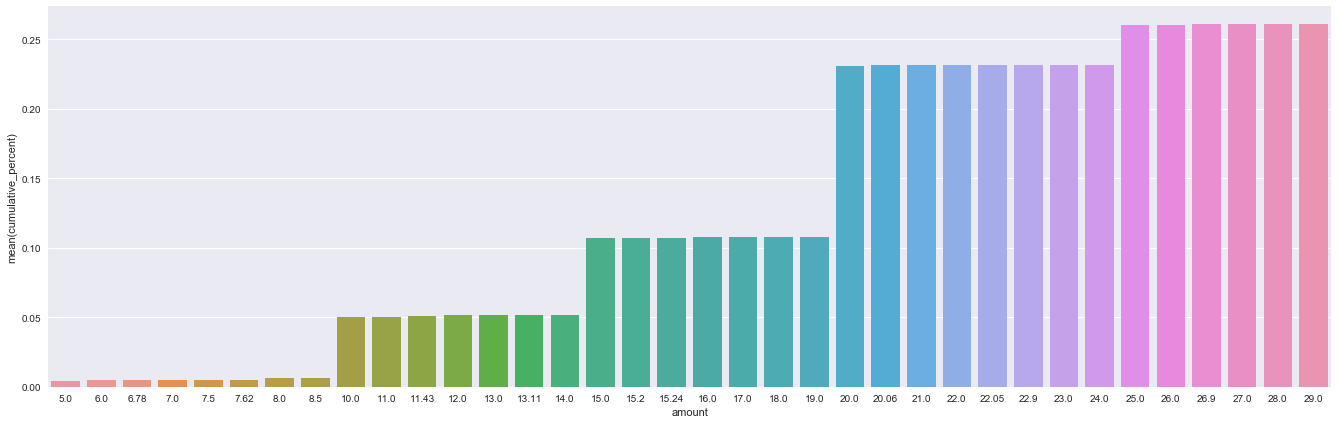

In [52]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount[amount_df.amount<30],y=amount_df.cumulative_percent)


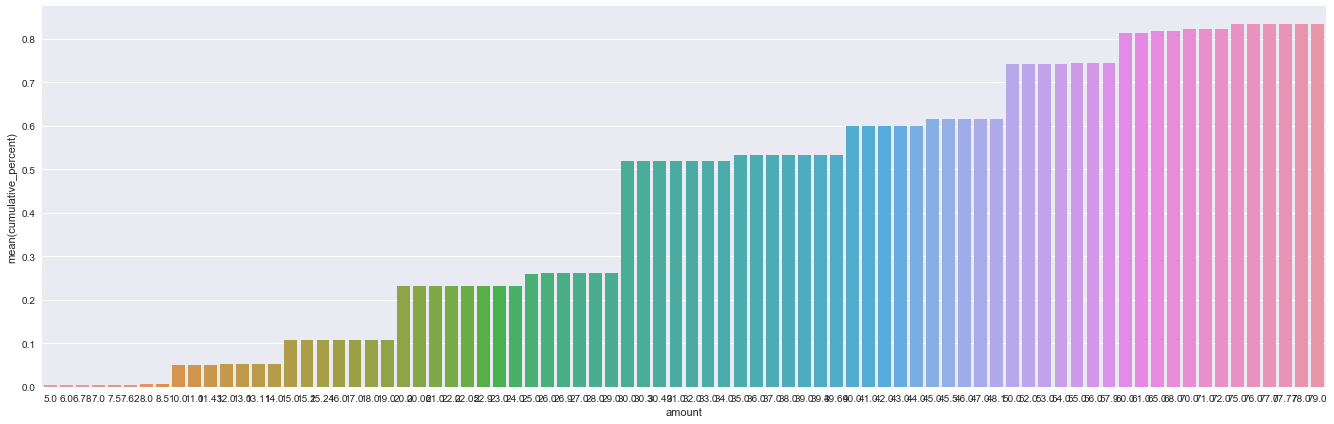

In [89]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount[amount_df.amount<80],y=amount_df.cumulative_percent)


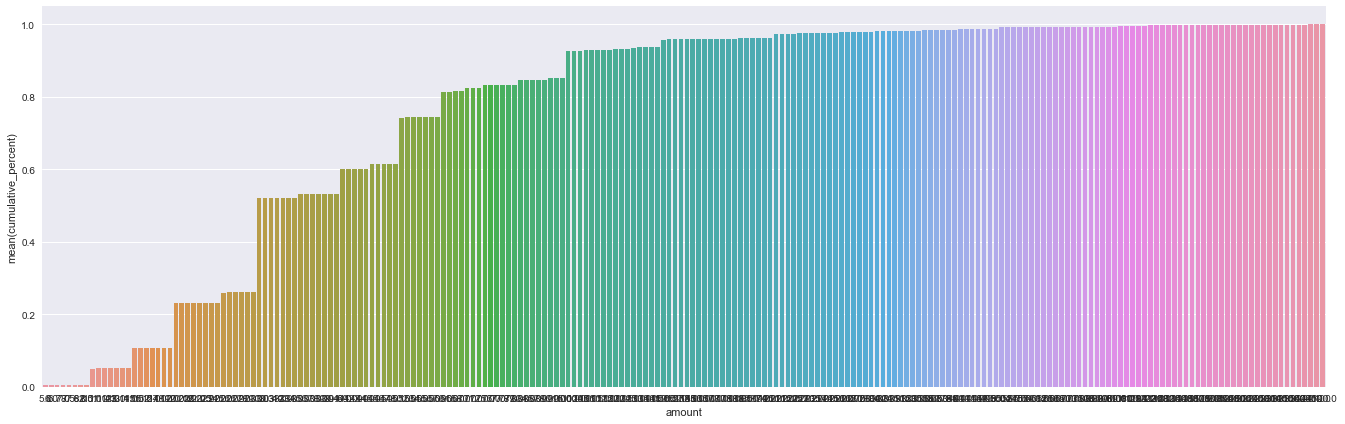

In [91]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount,y=amount_df.cumulative_percent)


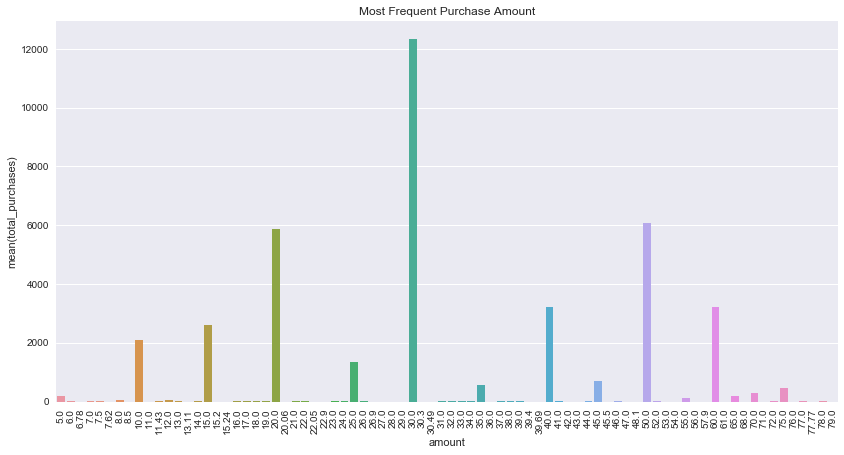

In [58]:
plt.figure(figsize=(14,7))
total = sns.barplot(x=amount_df.amount[amount_df.amount<80],y=amount_df.total_purchases)
for item in total.get_xticklabels():
    item.set_rotation(90)

plt.title('Most Frequent Purchase Amount')

#### most popular amount is \$30. We will segment into two cohorts: <\$30 and >\$30

# Frequency

In [60]:
frequency_df = state_df.groupby('customer_id').count().reset_index()

In [61]:
frequency_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
0,80,6,6,6,6,6,6,6,6,6,6
1,90,8,8,8,8,8,8,8,8,8,8
2,120,1,1,1,1,1,1,1,1,1,1
3,130,1,1,1,1,1,1,1,1,1,1
4,160,1,1,1,1,1,1,1,1,1,1


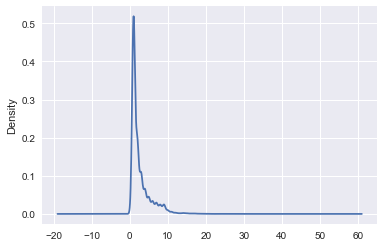

In [62]:
frequency_df.amount.plot(kind="kde")

/Users/laurakirk/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


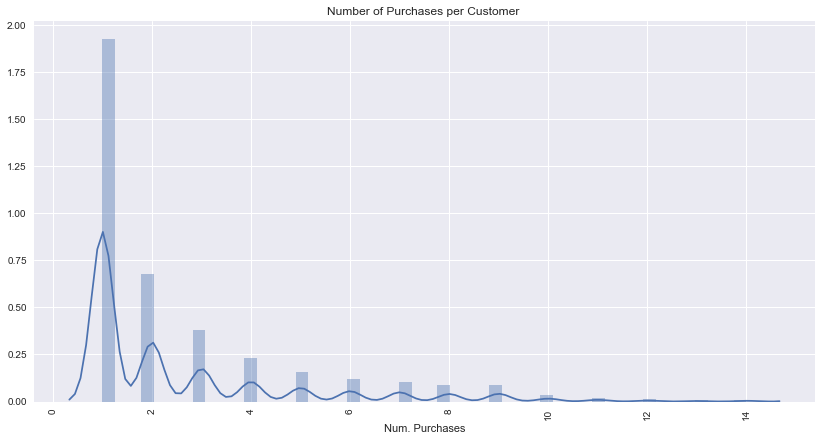

In [65]:
plt.figure(figsize=(14,7))
freq = sns.distplot(frequency_df.amount[frequency_df.amount<15])
for item in freq.get_xticklabels():
    item.set_rotation(90)

plt.title('Number of Purchases per Customer ')
plt.xlabel('Num. Purchases')

#### most popular frequency is 1 purchase. We will segment into two cohorts: < 1 and > 1 purchase

# Recency Matrix 

In [18]:
recency_df = state_df.ix[state_df.groupby('customer_id').date.idxmax(), :]
recency_df.days_since_purchase = recency_df.days_since_purchase.apply(lambda x:x.days)

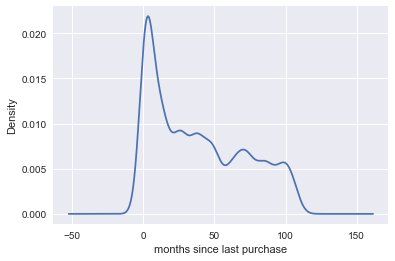

In [19]:
recency_df.months_since_purchase.plot(kind='kde')
plt.xlabel('months since last purchase')

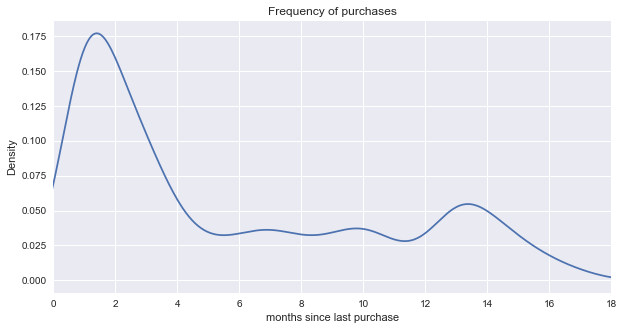

In [21]:
plt.figure(figsize=(10,5))
recency_df.months_since_purchase[recency_df.months_since_purchase<18].plot(kind='kde',xlim=[0,18])
plt.xlabel('months since last purchase')
plt.title('Frequency of purchases')

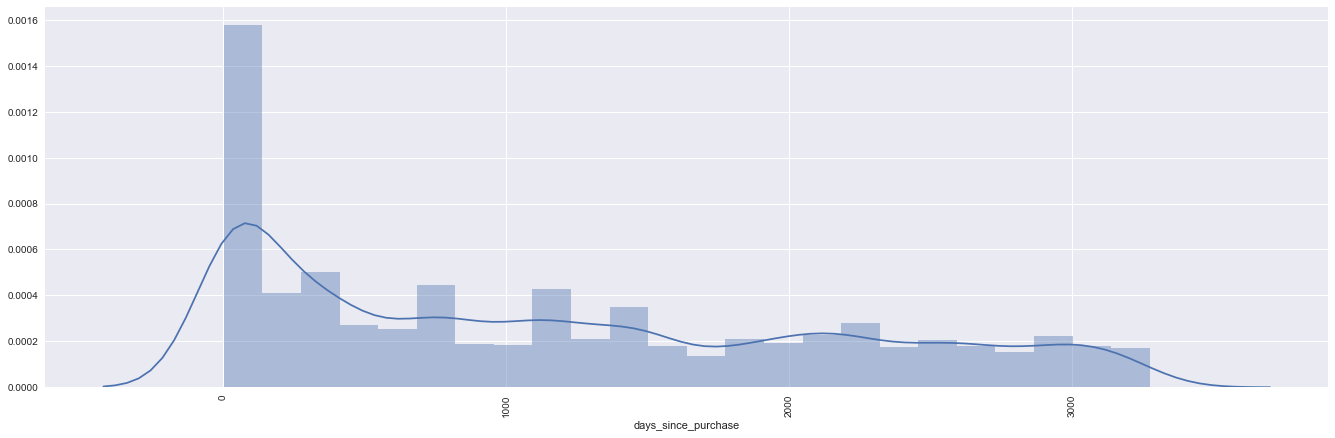

In [167]:
plt.figure(figsize=(23,7))
recency_plot = sns.distplot(recency_df.days_since_purchase)
for item in recency_plot.get_xticklabels():
    item.set_rotation(90)

recency_plot

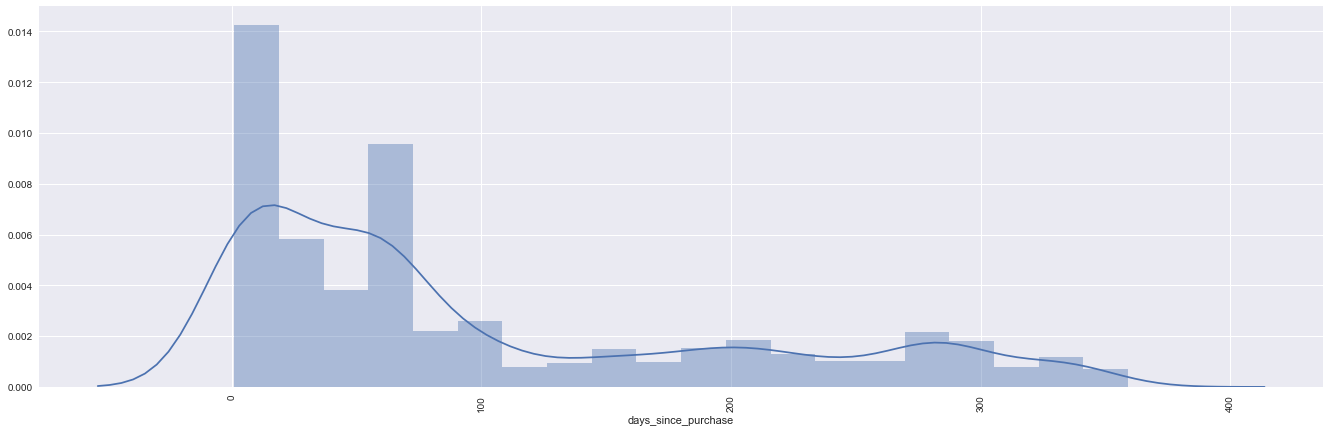

In [172]:
plt.figure(figsize=(23,7))
recency_plot = sns.distplot(recency_df.days_since_purchase[recency_df.days_since_purchase<360])
for item in recency_plot.get_xticklabels():
    item.set_rotation(90)

recency_plot

/Users/laurakirk/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


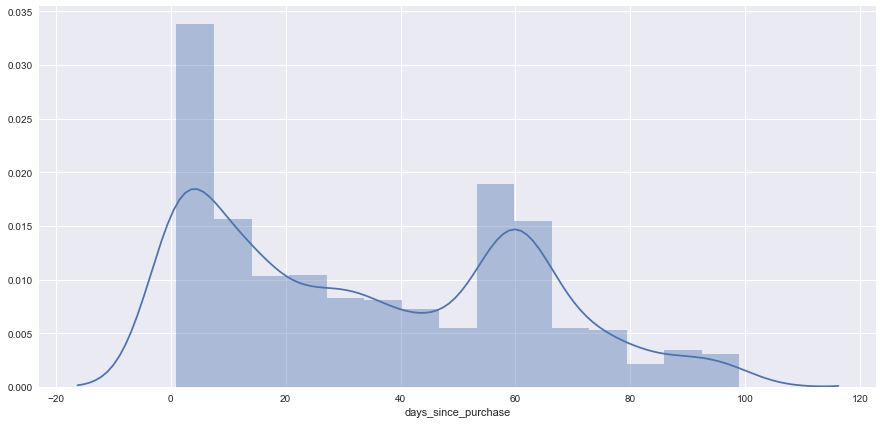

In [45]:
plt.figure(figsize=(15,7))
sns.distplot(recency_df.days_since_purchase[recency_df.days_since_purchase<100])
plt.title('')
#plt.xticks([i for i in range(100)], fontsize = 10)

# for item in recency_plot.get_xticklabels():=3
#     item.set_rotation(90)



### Using days is too noisy, therefore let us use 12 months as the state segmentation

# Transition Matrix
- Start with recency

In [230]:
recency_df[(recency_df.months_since_purchase>12) & (recency_df.months_since_purchase<=24)]['customer_id'].count()

1958

In [240]:
# people who have purchase in last year
people_purchase_this_year = recency_df[recency_df.months_since_purchase<=12]['customer_id'].count()
people_purchase_year_two = recency_df[(recency_df.months_since_purchase>12) & (recency_df.months_since_purchase<=24)]['customer_id'].count()
people_purchase_year_three = recency_df[(recency_df.months_since_purchase>24) & (recency_df.months_since_purchase<=36)]['customer_id'].count()
people_purchase_year_four = recency_df[(recency_df.months_since_purchase>36) & (recency_df.months_since_purchase<=48)]['customer_id'].count()
people_purchase_year_five = recency_df[(recency_df.months_since_purchase>48) & (recency_df.months_since_purchase<=60)]['customer_id'].count()
people_purchase_year_six = recency_df[(recency_df.months_since_purchase>60) & (recency_df.months_since_purchase<=72)]['customer_id'].count()
people_purchase_year_seven = recency_df[(recency_df.months_since_purchase>72) & (recency_df.months_since_purchase<=84)]['customer_id'].count()
people_purchase_year_eight = recency_df[(recency_df.months_since_purchase>84) & (recency_df.months_since_purchase<=96)]['customer_id'].count()
people_purchase_year_nine = recency_df[(recency_df.months_since_purchase>96) & (recency_df.months_since_purchase<=108)]['customer_id'].count()


In [235]:
## make sure we are not missing any customers
len(state_df.customer_id.unique()) == total_customers 

True

In [215]:
total_customers = recency_df.customer_id.count()

In [245]:
state_probs = [float(people_purchase_this_year*1.0 / total_customers),
               float(people_purchase_year_two*1.0 / total_customers),
               float(people_purchase_year_three*1.0 / total_customers),
               float(people_purchase_year_four*1.0 / total_customers),
               float(people_purchase_year_five*1.0 / total_customers),
               float(people_purchase_year_six*1.0 / total_customers),
               float(people_purchase_year_seven*1.0 / total_customers),
               float(people_purchase_year_eight*1.0 / total_customers),
               float(people_purchase_year_nine*1.0 / total_customers)]

In [246]:
state_probs

[0.30464473164399797,
 0.1105028500479711,
 0.10739883740617416,
 0.10897906202381624,
 0.0725774592245612,
 0.0824538630848242,
 0.07477848637056267,
 0.06580506800609515,
 0.0728596421919973]

In [251]:
trans_matrix = pd.DataFrame(state_probs, columns=["state_one"])

In [252]:
trans_matrix['state_two'] = 

,state_one
0,0.304645
1,0.110503
2,0.107399
3,0.108979
4,0.072577
5,0.082454
6,0.074778
7,0.065805
8,0.072860
